In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import seaborn as sb
import datetime
from scipy.stats import linregress
import datetime

In [55]:
realestate_sales_df = pd.read_csv("aus-property-sales-sep2018-april2020.csv")
realestate_sales_df

,date_sold,price,suburb,city_name,state,lat,lon,bedrooms,property_type,loc_pid,lga_pid
0,2018-09-18 00:00:00,NaN,Darling Point,Sydney,NSW,-33.869565,151.241317,3,unit,NSW1221,NSW180
1,2018-09-24 00:00:00,NaN,Darling Point,Sydney,NSW,-33.872179,151.239726,3,unit,NSW1221,NSW180
2,2018-09-26 00:00:00,1730000.0,Darling Point,Sydney,NSW,-33.868386,151.237471,2,unit,NSW1221,NSW180
3,2018-09-26 00:00:00,1928000.0,Darling Point,Sydney,NSW,-33.875465,151.236280,3,unit,NSW1221,NSW180
4,2018-10-02 00:00:00,1475000.0,Darling Point,Sydney,NSW,-33.875734,151.233575,3,unit,NSW1221,NSW180
...,...,...,...,...,...,...,...,...,...,...,...
320329,2019-09-09 00:00:00,NaN,Taylor,Canberra,ACT,-35.152128,149.099435,3,townhouse,ACT934,ACT
320330,2019-09-10 00:00:00,549900.0,Taylor,Canberra,ACT,-35.151968,149.107229,3,townhouse,ACT934,ACT
320331,2019-09-10 00:00:00,499900.0,Taylor,Canberra,ACT,-35.151968,149.107229,3,townhouse,ACT934,ACT
320332,2020-03-10 00:00:00,434000.0,Taylor,Canberra,ACT,-35.152617,149.103578,3,townhouse,ACT934,ACT


In [61]:
realestate_sales_df['date_sold'] = pd.to_datetime(realestate_sales_df['date_sold'], format="%Y-%m-%d %H:%M:%S")
realestate_sales_df['quarter'] = realestate_sales_df['date_sold'].dt.quarter
realestate_sales_df['year']= realestate_sales_df['date_sold'].dt.year

In [80]:
#Narrow data to WA only

wa_realestate_df = realestate_sales_df.loc[realestate_sales_df['state']=="WA"]

In [81]:
wa_realestate_df

,date_sold,price,suburb,city_name,state,lat,lon,bedrooms,property_type,loc_pid,lga_pid,quarter,year
54789,2019-02-06,120000.0,Kelmscott,Perth,WA,-32.118235,116.018271,3,unit,WA2915,WA321,1,2019
54790,2019-05-24,NaN,Kelmscott,Perth,WA,-32.117147,116.011979,3,unit,WA2915,WA321,2,2019
54791,2020-02-27,329000.0,Kelmscott,Perth,WA,-32.120796,116.019722,3,unit,WA2915,WA321,1,2020
54792,2020-06-23,159000.0,Kelmscott,Perth,WA,-32.110688,116.014602,2,unit,WA2915,WA321,2,2020
54793,2019-04-22,NaN,Piara Waters,Perth,WA,-32.137776,115.928161,3,unit,WA3112,WA321,2,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
313743,2020-03-21,870000.0,Burswood,Perth,WA,-31.957961,115.895464,4,townhouse,WA3151,WA316,1,2020
313744,2020-05-11,NaN,Burswood,Perth,WA,-31.969290,115.896280,3,townhouse,WA3151,WA316,2,2020
313745,2019-04-20,NaN,Lathlain,Perth,WA,-31.970371,115.903924,3,townhouse,WA3334,WA316,2,2019
313746,2019-07-19,NaN,Lathlain,Perth,WA,-31.974653,115.906999,3,townhouse,WA3334,WA316,3,2019


In [82]:
wa_realestate_df.sort_values(['date_sold'], ascending = True) 

,date_sold,price,suburb,city_name,state,lat,lon,bedrooms,property_type,loc_pid,lga_pid,quarter,year
235071,2018-09-02,530000.0,East Victoria Park,Perth,WA,-31.989368,115.903813,3,house,WA3143,WA316,3,2018
202249,2018-09-02,170000.0,Armadale,Perth,WA,-32.143731,115.994765,3,house,WA3220,WA321,3,2018
228033,2018-09-02,NaN,Two Rocks,Perth,WA,-31.505544,115.599803,3,house,WA2518,WA309,3,2018
57108,2018-09-02,280000.0,Como,Perth,WA,-31.993275,115.873553,2,unit,WA3142,WA318,3,2018
54858,2018-09-02,155500.0,Maylands,Perth,WA,-31.935291,115.901328,1,unit,WA3156,WA314,3,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
215228,2020-07-16,NaN,Bateman,Perth,WA,-32.049090,115.844721,4,house,WA3104,WA312,3,2020
229519,2020-07-16,670000.0,Clarkson,Perth,WA,-31.695755,115.721247,4,house,WA3199,WA309,3,2020
312607,2020-07-16,NaN,Maylands,Perth,WA,-31.941193,115.906177,2,townhouse,WA3156,WA314,3,2020
213000,2020-07-16,NaN,Kingsley,Perth,WA,-31.800630,115.785950,5,house,WA3187,WA371,3,2020


In [83]:
wa_realestate_df.property_type.unique()

array(['unit', 'house', 'townhouse'], dtype=object)

In [84]:
wa_realestate_df.suburb.unique()

array(['Kelmscott', 'Piara Waters', 'Armadale', 'Mount Richon',
       'Bayswater', 'Morley', 'Maylands', 'Embleton', 'Rivervale',
       'Cloverdale', 'Redcliffe', 'Belmont', 'Ascot', 'Canning Vale',
       'Willetton', 'Shelley', 'Parkwood', 'Riverton', 'Wilson',
       'Cannington', 'Ferndale', 'Bentley', 'Queens Park',
       'East Cannington', 'Lynwood', 'St James', 'Munster', 'Beeliar',
       'Atwell', 'Success', 'Coogee', 'Spearwood', 'Hamilton Hill',
       'North Coogee', 'Yangebup', 'Coolbellup', 'Leeming',
       'Hammond Park', 'Aubin Grove', 'Cockburn Central', 'Fremantle',
       'South Fremantle', "O'Connor", 'North Fremantle', 'Beaconsfield',
       'White Gum Valley', 'Martin', 'Thornlie', 'Gosnells', 'Maddington',
       'Beckenham', 'Woodvale', 'Joondalup', 'Duncraig', 'Greenwood',
       'Warwick', 'Hillarys', 'Heathridge', 'Mullaloo', 'Craigie',
       'Edgewater', 'Kingsley', 'Ocean Reef', 'Sorrento', 'Marmion',
       'Beldon', 'Kinross', 'Connolly', 'Currambine

In [85]:
totsales_suburb = wa_realestate_df['suburb'].value_counts()
totsales_suburb.head(30)

Baldivis          760
Canning Vale      558
Scarborough       479
Dianella          463
Morley            441
Thornlie          421
Ellenbrook        417
Rockingham        380
South Perth       366
East Perth        363
Maylands          362
Duncraig          360
Perth             349
Como              348
Gosnells          338
Bayswater         331
Byford            319
Willetton         319
Clarkson          310
Butler            293
Secret Harbour    292
Mount Lawley      291
Claremont         291
Wembley           290
Subiaco           273
Armadale          272
Port Kennedy      270
Waikiki           268
Ballajura         268
Rivervale         261
Name: suburb, dtype: int64

In [86]:
totsales_property = wa_realestate_df['property_type'].value_counts()
totsales_property

house        34299
unit          4138
townhouse     1224
Name: property_type, dtype: int64

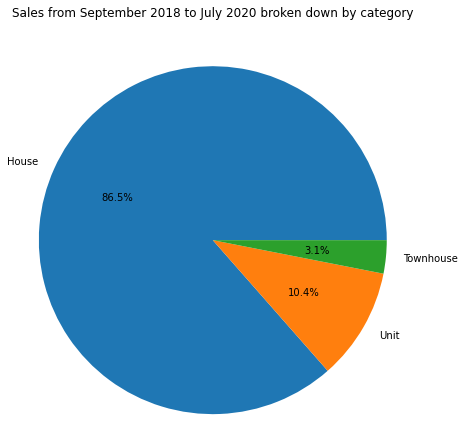

In [87]:
plt.pie(totsales_property, labels=['House','Unit', 'Townhouse'], radius = 2, autopct='%1.1f%%')
plt.title("Sales from September 2018 to July 2020 broken down by category", y= 1.5)
plt.show()

In [88]:
print(wa_realestate_df.dtypes)

date_sold        datetime64[ns]
price                   float64
suburb                   object
city_name                object
state                    object
lat                     float64
lon                     float64
bedrooms                  int64
property_type            object
loc_pid                  object
lga_pid                  object
quarter                   int64
year                      int64
dtype: object


AttributeError: Can only use .str accessor with string values!

In [91]:
wa_realestate_df.price.isnull().sum().sum()

12995